In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2


import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_style('white')
# sns.set_context('notebook', font_scale=1.3)

import itertools as it
from collections import Counter, defaultdict, deque

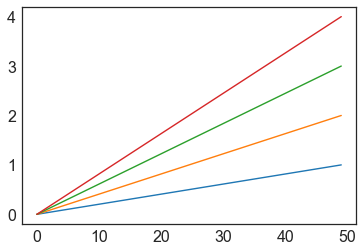

In [3]:
sns.set('paper', 'white', 'tab10', font_scale=2)

plt.plot(np.linspace(0,1))
plt.plot(np.linspace(0,2))
plt.plot(np.linspace(0,3))
plt.plot(np.linspace(0,4))

In [3]:
import json
df = pd.read_csv('../data/03242018/trials.csv', index_col=0)
for col in ['outcome_probs', 'ground_truth', 'clicks']:
    df[col] = df[col].apply(json.loads)

In [3]:
cd ../../python

/Users/fred/Projects/mcrl/python


In [77]:
from oldmouselab import OldMouselabEnv, Normal
N_GAMBLE = 7
N_OUTCOME = 4
N_CELL = N_GAMBLE * N_OUTCOME

env = OldMouselabEnv(N_GAMBLE, N_OUTCOME)

In [113]:
TOLERANCE = 0.1
from tqdm import tqdm

def expand(df):
    for i, row in tqdm(df.iterrows(), total=len(df)):
        env = OldMouselabEnv(N_GAMBLE, row.outcome_probs, cost=.01, ground_truth=row.ground_truth, 
                             reward=Normal(row.reward_mu, row.reward_sigma))
        pol = read_ombo_policy(row.reward_mu, row.reward_sigma, row.outcome_probs)
        agent = Agent()
        agent.register(env)
        agent.register(pol)

        for a in [*row.clicks, env.term_action]:
            prefs = np.array([pol.preference(a) for a in range(N_CELL + 1)])
            prefs -= prefs.max()
            is_optimal = prefs > -TOLERANCE
            
            yield {'action': a, 'state': env._state, 'prefs': prefs,
                   'optimal': is_optimal[a], 'prob': is_optimal[a] / is_optimal.sum(),
                   'workerid': row.workerid, 'trial_index': row.trial_index}
            env.step(a)

data = pd.DataFrame(expand(df))

  8%|▊         | 162/2000 [05:44<1:05:04,  2.12s/it]/usr/local/lib/miniconda3/lib/python3.6/site-packages/scipy/integrate/quadpack.py:364: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  warnings.warn(msg, IntegrationWarning)
 14%|█▍        | 289/2000 [11:05<1:05:40,  2.30s/it]

KeyboardInterrupt: 

In [41]:
pol = read_ombo_policy(row.reward_mu, row.reward_sigma, row.outcome_probs)
pol.theta

array([2.426, 0.68 , 0.   , 0.32 , 1.   ])

In [89]:
from policies import LiederPolicy
from evaluation import read_ombo_policy
from agents import Agent



env = OldMouselabEnv(N_GAMBLE, row.outcome_probs, cost=.01, ground_truth=row.ground_truth, 
                     reward=Normal(row.reward_mu, row.reward_sigma))
pol = read_ombo_policy(row.reward_mu, row.reward_sigma, row.outcome_probs)







array([[False, False, False, False],
       [False,  True, False, False],
       [False,  True, False, False],
       [False,  True, False, False],
       [False,  True, False, False],
       [False,  True, False, False],
       [False,  True, False, False]])